# HW - LT4

**Bike sharing: AutoML**

## Load and prepare data

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import time

# Check the data
rides = pd.read_csv('hour.csv')
dummy = rides
rides.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [2]:
# Check the columns
rides.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Check and prepare the data

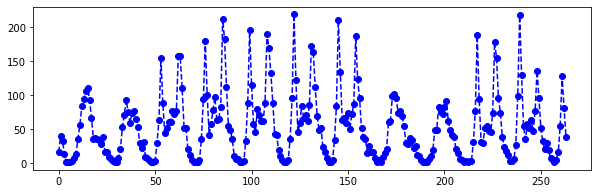

In [3]:
# Plot the data for first 11 days

days = 11
fig = plt.figure(figsize=(10, 3))
number= np.arange(24*days) # This is the first  11 days (every hour data x 24)
plt.plot(number,rides[:24*days]['cnt'] , 'bo--');

**Handle categorical data**

In [4]:
# Use one-hot encode to replace select categrical variables like season, weather, month using get_dummies()
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

rides.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# Drop the variables that are no longer needed

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head(5)

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
# Check if OHE worked
data.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt', 'season_1', 'season_2', 'season_3', 'season_4', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [7]:
len(data.columns)

59

## Split data into train, test, and val tests

### Split data test data and non-test data (training and validation)

In [8]:
# Use the last 21 days as test set
days = 21
test_data = data[-days*24:]
# Save the remaining data into data
data = data[:-21*24] 

In [9]:
# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']

# Use only 'cnt' as target field
features, targets = data.drop(target_fields, axis=1), data['cnt'] # Training Set
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data['cnt'] # Test Set

## Run AutoML

In [10]:
# Set parameters

# Set number of trials
num_trials = 5

# Assign X and Y
X = features
y = targets

# Assign test
X_test = test_features
y_test = test_targets

# Set feature names
feature_names = np.array(features.columns)

In [11]:
# KNN
def train_knn(X, y):
    start_time = time.time()
    score_train = []
    score_val = []
    k_range = range(1, 5)

    for seed in range(num_trials):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=seed)
        training_accuracy = []  
        val_accuracy = []

        for n_neighbors in k_range:  
            kNN = KNeighborsRegressor(n_neighbors=n_neighbors) 
            kNN.fit(X_train, y_train)
            training_accuracy.append(kNN.score(X_train, y_train))
            val_accuracy.append(kNN.score(X_val, y_val))

        score_train.append(training_accuracy)
        score_val.append(val_accuracy)   

    score_val_means = np.mean(score_val, axis=0)

    model_name = "kNN"

# alternative idxmax
    best_val = np.argmax(score_val_means)
    hyperparam = "n_neighbors"
    best_param = k_range[int(best_val)]
    cnt_predictor = "NA"
    
#    model_test = KNeighborsRegressor(n_neighbors=best_param).fit(X_train, y_train)

# Should be fit to the whole X, y
    model_test = KNeighborsRegressor(n_neighbors=best_param).fit(X, y)
    score_test = model_test.score(X_test, y_test)

# best_val + 1 (since 0-based indexing)

    run_time = (time.time() - start_time)
    return [model_name, best_val + 1, score_test, hyperparam, best_param,
            cnt_predictor, run_time]

In [12]:
train_knn(X, y)

['kNN', 2, 0.6124131773851734, 'n_neighbors', 2, 'NA', 136.12832927703857]

In [21]:
# LINEAR REGRESSION
def train_linear(X, y):
    start_time = time.time()
    score_train = []
    score_val = []
    mean_abs_coefs = []
    model_coefs = []

    for seed in range(num_trials):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=seed)

        LR = LinearRegression().fit(X_train, y_train)
        score_train.append(LR.score(X_train, y_train))
        score_val.append(LR.score(X_val, y_val))

        model_coefs.append(np.abs(LR.coef_))

    mean_abs_coefs = np.mean(model_coefs, axis=0)
    best_predictor = feature_names[np.argmax(mean_abs_coefs)]

    model_name = "Linear"
    best_val = np.amax(score_val)
    hyperparam = "NA"
    best_param = "NA"

    coefs_count = len(mean_abs_coefs)
    fig, ax = plt.subplots(figsize=(4,7))
    ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
    ax.set_xlabel('Feature importance')
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
    fig.suptitle(model_name)
    fig.tight_layout()

# should be X, y    
    model_test = LinearRegression().fit(X, y)
    score_test = model_test.score(X_test, y_test)

    run_time = (time.time() - start_time)
    return [model_name, best_val, score_test, hyperparam, best_param,
            best_predictor, run_time]

['Linear',
 0.6940615053268215,
 0.6571197099000996,
 'NA',
 'NA',
 'season_1',
 0.32099366188049316]

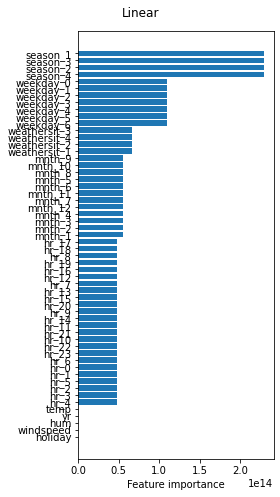

In [22]:
train_linear(X, y)

In [24]:
# RIDGE REGRESSION
def train_ridge(X, y):
    start_time = time.time()
    C = [1e-3, 1e-2, 0.1, 0.5, 2, 5, 10,  20, 100, 500, 1000, 5000]
    score_train = []
    score_val = []
    mean_abs_coefs = []

    for seed in range(num_trials):
        training_accuracy = []  
        val_accuracy = []
        model_coefs = []
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            ridge = Ridge(alpha=alpha_run).fit(X_train, y_train)
            training_accuracy.append(ridge.score(X_train, y_train))
            val_accuracy.append(ridge.score(X_val, y_val))
            model_coefs.append(np.abs(ridge.coef_))

        score_train.append(training_accuracy)
        score_val.append(val_accuracy)

    score_val_means = np.mean(score_val, axis=0)
    best_index = np.argmax(score_val_means)

    mean_abs_coefs = np.mean(model_coefs, axis=0)
    best_mean_coefs = mean_abs_coefs[best_index]
    best_predictor = feature_names[np.argmax(mean_abs_coefs)]

    model_name = "Ridge"
    best_val = np.amax(score_val_means)
    hyperparam = "C"
    best_param = C[best_index]

    coefs_count = len(mean_abs_coefs)
    fig, ax = plt.subplots(figsize=(4,7))
    ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
    ax.set_xlabel('Feature importance')
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
    fig.suptitle(model_name)
    fig.tight_layout()

    model_test = Ridge(alpha=best_param).fit(X, y)
    score_test = model_test.score(X_test, y_test)

    run_time = (time.time() - start_time)
    return [model_name, best_val, score_test, hyperparam, best_param,
            best_predictor, run_time]

['Ridge',
 0.6877081573209051,
 0.6565865776322635,
 'C',
 0.5,
 'hr_17',
 1.053983449935913]

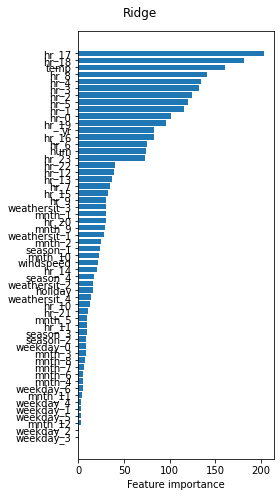

In [25]:
train_ridge(X, y)

In [26]:
# LASSO REGRESSION
def train_lasso(X, y):
    start_time = time.time()
    C = [1e-2, 0.1, 0.5, 2, 5, 10,  20, 100, 500, 1000, 5000]
    score_train = []
    score_val = []
    mean_abs_coefs = []

    for seed in range(num_trials):
        training_accuracy = []  
        val_accuracy = []
        model_coefs = []
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            lasso = Lasso(alpha=alpha_run, max_iter=5000).fit(X_train, y_train)
            training_accuracy.append(lasso.score(X_train, y_train))
            val_accuracy.append(lasso.score(X_val, y_val))
            model_coefs.append(np.abs(lasso.coef_))
        score_train.append(training_accuracy)
        score_val.append(val_accuracy)

    score_val_means = np.mean(score_val, axis=0)
    best_index = np.argmax(score_val_means)

    mean_abs_coefs = np.mean(model_coefs, axis=0)
    best_mean_coefs = mean_abs_coefs[best_index]
    best_predictor = feature_names[np.argmax(mean_abs_coefs)]

    model_name = "Lasso"
    best_val = np.amax(score_val_means)
    hyperparam = "C"
    best_param = C[best_index]

    coefs_count = len(mean_abs_coefs)
    fig, ax = plt.subplots(figsize=(4,7))
    ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
    ax.set_xlabel('Feature importance')
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
    fig.suptitle(model_name)
    fig.tight_layout()

    model_test = Lasso(alpha=best_param, max_iter=5000).fit(X, y)
    score_test = model_test.score(X_test, y_test)
    
    run_time = (time.time() - start_time)
    return [model_name, best_val, score_test, hyperparam, best_param,
            best_predictor, run_time]

['Lasso',
 0.6877326446380041,
 0.6565283824810112,
 'C',
 0.01,
 'temp',
 1.8517277240753174]

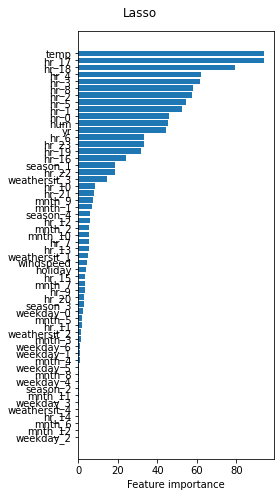

In [27]:
train_lasso(X, y)

In [28]:
# DECISION TREE
def train_DT(X, y):
    start_time = time.time()
    max_depth_range = range(1, 52, 5)
    score_train = []
    score_val = []
    mean_abs_coefs = []

    for seed in range(num_trials):
        training_accuracy = []  
        val_accuracy = []
        model_coefs = []
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=seed)

        for depth in max_depth_range:       
            DT = DecisionTreeRegressor(max_depth=depth).fit(X_train, y_train)
            training_accuracy.append(DT.score(X_train, y_train))
            val_accuracy.append(DT.score(X_val, y_val))
            model_coefs.append(np.abs(DT.feature_importances_))

        score_train.append(training_accuracy)
        score_val.append(val_accuracy)

    score_val_means = np.mean(score_val, axis=0)
    best_index = np.argmax(score_val_means)

    mean_abs_coefs = np.mean(model_coefs, axis=0)
    best_mean_coefs = mean_abs_coefs[best_index]
    best_predictor = feature_names[np.argmax(mean_abs_coefs)]

    model_name = "Decision Tree"
    best_val = np.amax(score_val_means)
    hyperparam = "Max depth"
    best_param = max_depth_range[best_index]

    coefs_count = len(mean_abs_coefs)
    fig, ax = plt.subplots(figsize=(4,7))
    ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
    ax.set_xlabel('Feature importance')
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
    fig.suptitle(model_name)
    fig.tight_layout()

    model_test = DecisionTreeRegressor(max_depth=best_param).fit(X, y)
    score_test = model_test.score(X_test, y_test)

    run_time = (time.time() - start_time)
    return [model_name, best_val, score_test, hyperparam, best_param,
            best_predictor, run_time]

['Decision Tree',
 0.8529788115645909,
 0.6418040771801271,
 'Max depth',
 26,
 'temp',
 4.346188306808472]

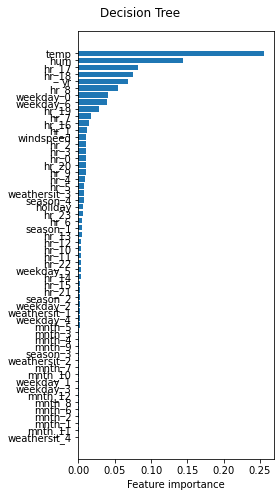

In [29]:
train_DT(X, y)

In [30]:
# RANDOM FOREST
def train_RF(X, y):
    start_time = time.time()
    max_features_range = [0.2, 0.4, 0.6, 0.8]
    score_train = []
    score_val = []
    mean_abs_coefs = []

    for seed in range(num_trials):
        training_accuracy = []  
        val_accuracy = []
        model_coefs = []
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=seed)

        for feature in max_features_range:       
            RF = RandomForestRegressor(max_features=feature).fit(X_train, y_train)
            training_accuracy.append(RF.score(X_train, y_train))
            val_accuracy.append(RF.score(X_val, y_val))
            model_coefs.append(np.abs(RF.feature_importances_))

        score_train.append(training_accuracy)
        score_val.append(val_accuracy)

    score_val_means = np.mean(score_val, axis=0)
    best_index = np.argmax(score_val_means)

    mean_abs_coefs = np.mean(model_coefs, axis=0)
    best_mean_coefs = mean_abs_coefs[best_index]
    best_predictor = feature_names[np.argmax(mean_abs_coefs)]

    model_name = "Random Forest"
    best_val = np.amax(score_val_means)
    hyperparam = "Max features"
    best_param = max_features_range[best_index]

    coefs_count = len(mean_abs_coefs)
    fig, ax = plt.subplots(figsize=(4,7))
    ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
    ax.set_xlabel('Feature importance')
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
    fig.suptitle(model_name)
    fig.tight_layout()

    model_test = RandomForestRegressor(max_features=best_param).fit(X, y)
    score_test = model_test.score(X_test, y_test)

    run_time = (time.time() - start_time)
    return [model_name, best_val, score_test, hyperparam, best_param,
            best_predictor, run_time]

['Random Forest',
 0.9182836940942349,
 0.8105944963644448,
 'Max features',
 0.8,
 'temp',
 75.275710105896]

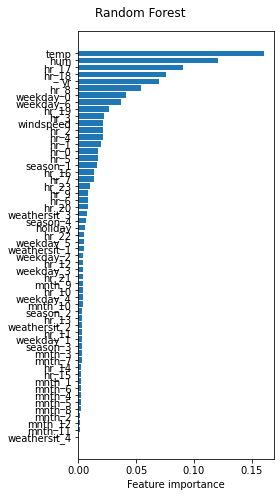

In [31]:
train_RF(X, y)

In [32]:
def train_GBM(X, y):
    start_time = time.time()
    max_features_range = [0.2, 0.4, 0.6, 0.8]
    score_train = []
    score_val = []
    mean_abs_coefs = []

    for seed in range(num_trials):
        training_accuracy = []  
        val_accuracy = []
        model_coefs = []
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=seed)

        for feature in max_features_range:       
            GBM = GradientBoostingRegressor(max_features=feature).fit(X_train, y_train)
            training_accuracy.append(GBM.score(X_train, y_train))
            val_accuracy.append(GBM.score(X_val, y_val))
            model_coefs.append(np.abs(GBM.feature_importances_))

        score_train.append(training_accuracy)
        score_val.append(val_accuracy)

    score_val_means = np.mean(score_val, axis=0)
    best_index = np.argmax(score_val_means)

    mean_abs_coefs = np.mean(model_coefs, axis=0)
    best_mean_coefs = mean_abs_coefs[best_index]
    best_predictor = feature_names[np.argmax(mean_abs_coefs)]

    model_name = "Gradient Boosting Method"
    best_val = np.amax(score_val_means)
    hyperparam = "Max features"
    best_param = max_features_range[best_index]

    coefs_count = len(mean_abs_coefs)
    fig, ax = plt.subplots(figsize=(4,7))
    ax.barh(np.arange(coefs_count), sorted(mean_abs_coefs))
    ax.set_xlabel('Feature importance')
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(feature_names[np.argsort(mean_abs_coefs)])
    fig.suptitle(model_name)
    fig.tight_layout()

    model_test = GradientBoostingRegressor(max_features=best_param).fit(X, y)
    score_test = model_test.score(X_test, y_test)
    
    run_time = (time.time() - start_time)
    return [model_name, best_val, score_test, hyperparam, best_param,
            best_predictor, run_time]

['Gradient Boosting Method',
 0.7670054950418269,
 0.6965761970925979,
 'Max features',
 0.8,
 'temp',
 12.991894006729126]

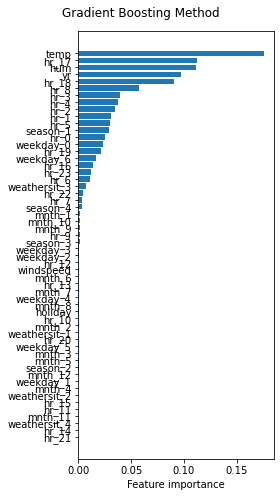

In [33]:
train_GBM(X, y)

,Regression Method,Best validation accuracy,Test accuracy,Hyperparameter,Best parameter value,Top predictor variable,Run time
0,Linear,0.694062,0.657120,NA,NA,season_1,0.330518
1,Lasso,0.687733,0.656528,C,0.01,temp,1.601096
2,Ridge,0.687708,0.656587,C,0.5,hr_17,1.002455
3,kNN,1.000000,0.639972,n_neighbors,2,NA,321.816724
4,Decision Tree,0.852270,0.604266,Max depth,26,temp,4.133003
5,Random Forest,0.918512,0.818161,Max features,0.8,temp,71.129501
6,Gradient Boosting Method,0.769043,0.676159,Max features,0.8,temp,13.075108


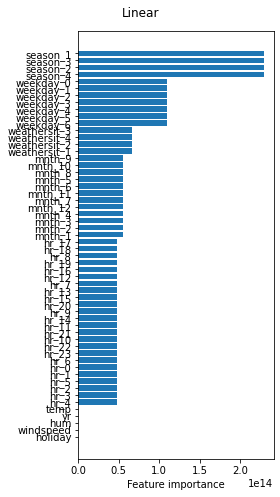

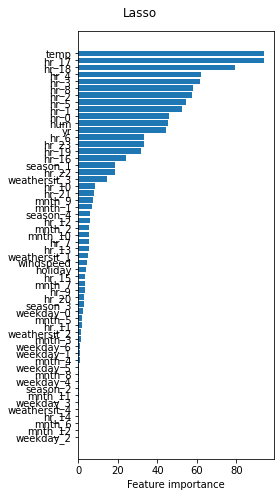

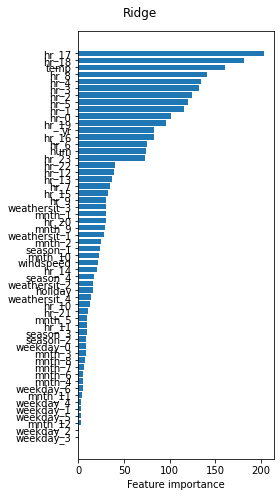

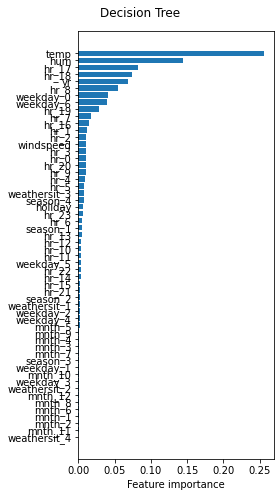

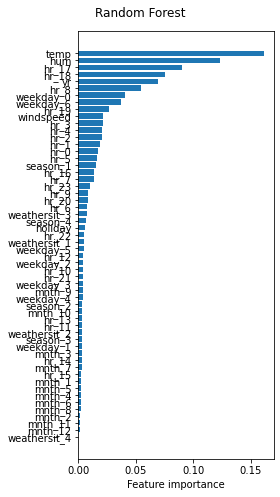

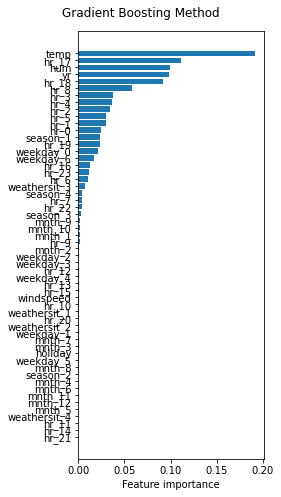

In [34]:
cols = ['Regression Method', 'Best validation accuracy',
        'Test accuracy', 'Hyperparameter', 'Best parameter value', 'Top predictor variable', 'Run time']
df_results = pd.DataFrame(columns=cols)

df_results.loc[0] = train_linear(X, y)
df_results.loc[1] = train_lasso(X, y)
df_results.loc[2] = train_ridge(X, y)
df_results.loc[3] = train_knn(X, y)
df_results.loc[4] = train_DT(X, y)
df_results.loc[5] = train_RF(X, y)
df_results.loc[6] = train_GBM(X, y)
display(df_results)